## Project Milestone 5 

In [2]:
import import_ipynb

#### load CSV data set in to SQL Lite

In [34]:
%store -r Freelancer_Ethnicity
print(Freelancer_Ethnicity.head())

     Asian Indian Pakistani_Bangladeshi other_Asian Black Mixed White  \
2017  17.1   12.8                  24.1        15.2  12.3  13.7  15.1   
2018  15.8   13.2                  20.4        13.9  11.2  11.4  15.1   
2019  17.5   14.7                  23.2        14.6  11.2  14.0  15.2   
2020  14.7   12.1                  19.3        14.1  10.9  13.2  14.1   
2021  13.3   11.4                  16.2        13.2   9.8  12.3  13.4   

     British_White Other_White Other  Year  
2017          14.8        17.6  17.2  2017  
2018          14.9        17.2  19.0  2018  
2019          14.9        17.5  20.1  2019  
2020          14.0        15.9  12.6  2020  
2021          13.2        16.1  15.6  2021  


In [35]:
import pandas as pd
import sqlite3
table_name = 'Freelancer_Ethnicity'

conn = sqlite3.connect('Freelancer.db')
query = f'Create table if not Exists {table_name} (Asian real, Indian real, Pakistani_Bangladeshi real, other_Asian real, Black real, Mixed real, White real, British_White real, Other_White real, Other real, Year real)'
conn.execute(query)
Freelancer_Ethnicity.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()


#### load Website data set in to SQL Lite

In [9]:
%store -r US_Freelancers
print(US_Freelancers.head())

   Year Freelancers_in_millions Predicted Collected  Growth
1  2017                    57.3         0         1    1.04
2  2018                    59.7         0         1    1.04
3  2019                    62.2         0         1    1.04
4  2020                    64.8         0         1    1.04
5  2021                    67.4         0         1    1.04


In [10]:
table_pop = 'Freelancer_Population'
conn = sqlite3.connect('Freelancer.db')
query = f'Create table if not Exists {table_pop} (Year real, Freelancers_in_millions real, Predicted real, Collected real, Growth real)'
conn.execute(query)
US_Freelancers.to_sql(table_pop,conn,if_exists='replace',index=False)
conn.commit()
conn.close()

#### load API data set in to SQL Lite

In [ ]:
# Simplified API data results with estimated listings calculated from CSV File freelancer Population growth 
%store -r df
print(df.head())

   Year  Listings   accuracy
0  2017    2174.0  Estimated
1  2018    2261.0  Estimated
2  2019    2351.0  Estimated
3  2020    2445.0  Estimated
4  2021    2543.0  Estimated


In [42]:
# removing unnecessary columns that are repeated or lack values
df_api = df_api.drop(columns=['seo_info', 'active_project_count', 'category', 'name', 'seo_url'])

In [ ]:
# Simplified API data results with estimated listings calculated from CSV File freelancer Population growth 
%store -r df
print(df.head())

   Year  Listings   accuracy
0  2017    2174.0  Estimated
1  2018    2261.0  Estimated
2  2019    2351.0  Estimated
3  2020    2445.0  Estimated
4  2021    2543.0  Estimated


In [13]:

table_post = 'Freelancer_Postings'
conn = sqlite3.connect('Freelancer.db')
query = f'Create table if not Exists {table_post} (Year real, Listings real,  accuracy text)'
conn.execute(query)
df.to_sql(table_post,conn,if_exists='replace',index=False)
conn.commit()
conn.close()

#### load data sets from SQLite and joining them into one 

In [36]:
conn = sqlite3.connect('Freelancer.db')
def sql_fetch(conn):
    c = conn.cursor()
    c.execute('SELECT name from sqlite_master where type= "table" ')
    print(c.fetchall())
    
sql_fetch(conn)

[('Freelancer_Questionaire',), ('Freelancer_Population',), ('Freelancer_Postings',), ('Freelancer_Ethnicity',)]


In [41]:
def get_col_names(conn):
    c = conn.cursor()
    c.execute("select * from Freelancer_Ethnicity")
    return [member [0] for member in c.description]
get_col_names(conn)

['Asian',
 'Indian',
 'Pakistani_Bangladeshi',
 'other_Asian',
 'Black',
 'Mixed',
 'White',
 'British_White',
 'Other_White',
 'Other',
 'Year']

In [88]:
# Joining Dataframes by their year feature
c = conn.cursor()
pop_ethnic = c.execute('''SELECT * From Freelancer_Population 
                       INNER JOIN Freelancer_Postings 
                       ON Freelancer_Population.Year = Freelancer_Postings.Year 
                       INNER JOIN Freelancer_Ethnicity 
                       ON Freelancer_Postings.Year = Freelancer_Ethnicity.Year''')
pop_ethnic = c.fetchall()

keys = [member [0] for member in c.description]
joined_df = DataFrame(pop_ethnic)
joined_df.columns = keys

In [89]:
# Joined Tables In One DataFrame
joined_df

,Year,Freelancers_in_millions,Predicted,Collected,Growth,Year,Listings,accuracy,Asian,Indian,Pakistani_Bangladeshi,other_Asian,Black,Mixed,White,British_White,Other_White,Other,Year
0,2017,57.3,0,1,1.04,2017,2174.0,Estimated,17.1,12.8,24.1,15.2,12.3,13.7,15.1,14.8,17.6,17.2,2017
1,2018,59.7,0,1,1.04,2018,2261.0,Estimated,15.8,13.2,20.4,13.9,11.2,11.4,15.1,14.9,17.2,19.0,2018
2,2019,62.2,0,1,1.04,2019,2351.0,Estimated,17.5,14.7,23.2,14.6,11.2,14.0,15.2,14.9,17.5,20.1,2019
3,2020,64.8,0,1,1.04,2020,2445.0,Estimated,14.7,12.1,19.3,14.1,10.9,13.2,14.1,14.0,15.9,12.6,2020
4,2021,67.4,0,1,1.04,2021,2543.0,Estimated,13.3,11.4,16.2,13.2,9.8,12.3,13.4,13.2,16.1,15.6,2021


In [96]:
joined_df.T.drop_duplicates().T

,Year,Freelancers_in_millions,Predicted,Collected,Growth,Listings,accuracy,Asian,Indian,Pakistani_Bangladeshi,other_Asian,Black,Mixed,White,British_White,Other_White,Other,Year
0,2017,57.3,0,1,1.04,2174.0,Estimated,17.1,12.8,24.1,15.2,12.3,13.7,15.1,14.8,17.6,17.2,2017
1,2018,59.7,0,1,1.04,2261.0,Estimated,15.8,13.2,20.4,13.9,11.2,11.4,15.1,14.9,17.2,19.0,2018
2,2019,62.2,0,1,1.04,2351.0,Estimated,17.5,14.7,23.2,14.6,11.2,14.0,15.2,14.9,17.5,20.1,2019
3,2020,64.8,0,1,1.04,2445.0,Estimated,14.7,12.1,19.3,14.1,10.9,13.2,14.1,14.0,15.9,12.6,2020
4,2021,67.4,0,1,1.04,2543.0,Estimated,13.3,11.4,16.2,13.2,9.8,12.3,13.4,13.2,16.1,15.6,2021


In [105]:
joined_df.drop(joined_df.columns[18], axis=1)

,Freelancers_in_millions,Predicted,Collected,Growth,Listings,accuracy,Asian,Indian,Pakistani_Bangladeshi,other_Asian,Black,Mixed,White,British_White,Other_White,Other,Years
0,57.3,0,1,1.04,2174.0,Estimated,17.1,12.8,24.1,15.2,12.3,13.7,15.1,14.8,17.6,17.2,2017
1,59.7,0,1,1.04,2261.0,Estimated,15.8,13.2,20.4,13.9,11.2,11.4,15.1,14.9,17.2,19.0,2018
2,62.2,0,1,1.04,2351.0,Estimated,17.5,14.7,23.2,14.6,11.2,14.0,15.2,14.9,17.5,20.1,2019
3,64.8,0,1,1.04,2445.0,Estimated,14.7,12.1,19.3,14.1,10.9,13.2,14.1,14.0,15.9,12.6,2020
4,67.4,0,1,1.04,2543.0,Estimated,13.3,11.4,16.2,13.2,9.8,12.3,13.4,13.2,16.1,15.6,2021


In [103]:
Year = [2017,2018,2019,2020,2021]
joined_df['Years'] = Year

## Visualizations

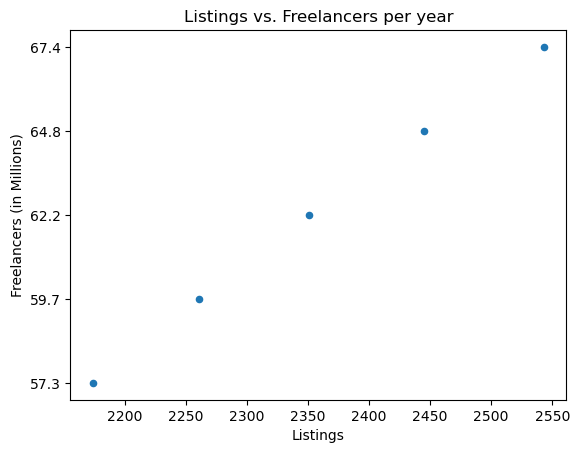

In [112]:
# Visual 1, Scatter plot 
import matplotlib.pyplot as plt
import numpy as pd

joined_df.plot.scatter(x = 'Listings', y = 'Freelancers_in_millions')

plt.xlabel('Listings')
# naming the y axis
plt.ylabel('Freelancers (in Millions)')
  
# giving a title to my graph
plt.title('Listings vs. Freelancers per year')
  
# function to show the plot
plt.show()

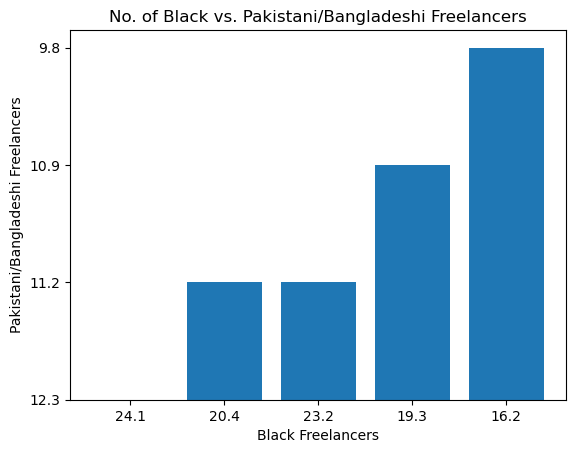

In [114]:
# Visual 2, bar plot between the ethnicity with most freelancers and ethnicity with least freelancers

PB = joined_df['Pakistani_Bangladeshi']
black = joined_df['Black']

plt.bar(PB, black)
 
plt.xlabel("Black Freelancers")
plt.ylabel("Pakistani/Bangladeshi Freelancers")
plt.title("No. of Black vs. Pakistani/Bangladeshi Freelancers")
plt.show()

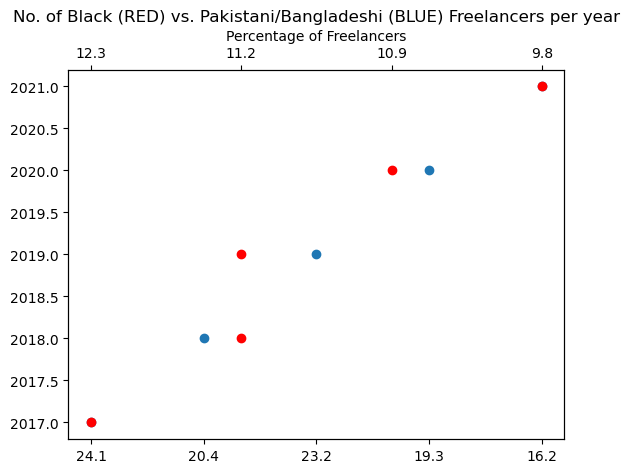

In [116]:
# Visual 3, Scatter plot demonstrating yearly changes between the freelancing population size for the smallest size ethnicity and largest population size ethnicty

fig, ax = plt.subplots()
ay = ax.twiny()

ax.scatter(joined_df['Pakistani_Bangladeshi'], joined_df['Years'])
ay.scatter(joined_df['Black'], joined_df['Years'], color='r')
plt.xlabel("Percentage of Freelancers")
plt.ylabel("Year")
plt.title("No. of Black (RED) vs. Pakistani/Bangladeshi (BLUE) Freelancers per year")
plt.show()

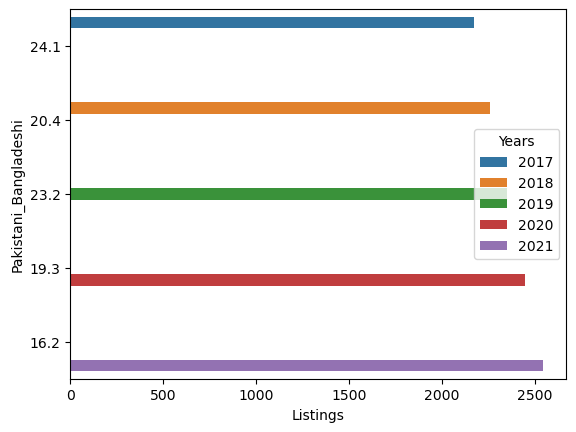

In [124]:
# Visual 4, boxplot to demonstrate growth over the years for the largest ethnic population in freelancing 

sns.barplot(x='Listings',y='Pakistani_Bangladeshi', data=joined_df,
            hue='Years')
 
plt.show()

    

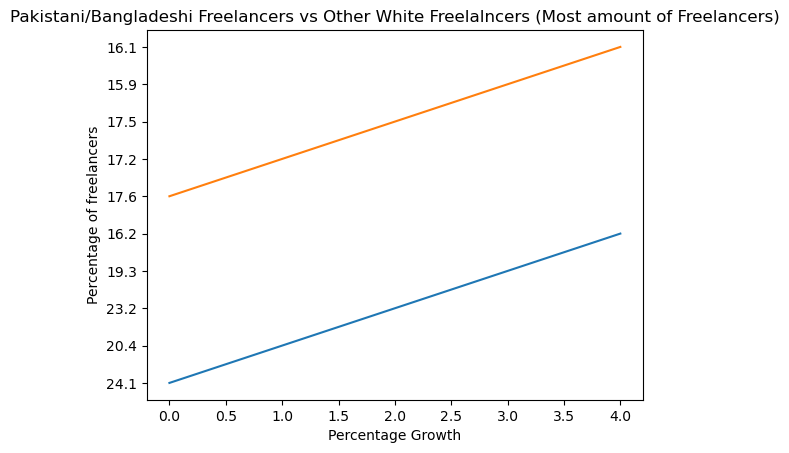

In [127]:
# Visual 5, line graph 
# Scatter plot with day against tip
plt.plot(joined_df['Pakistani_Bangladeshi'])
plt.plot(joined_df['Other_White'])
 
# Adding Title to the Plot
plt.title("Pakistani/Bangladeshi Freelancers vs Other White Freelalncers (Most amount of Freelancers)")
 
# Setting the X and Y labels
plt.xlabel('Percentage Growth')
plt.ylabel('Percentage of freelancers')
 
plt.show()

## Conclusion